In [3]:
# 3 CSV files with slightly different structures, containing price predictions (and confidence interval values) up to 2025-05-02.
# renaming of columns to comply with naming conventions of project

import pandas as pd
# Read the CSV files
df_0407 = pd.read_csv('Price_Preds_Processed_20250407.csv')
df_0411 = pd.read_csv('Price_Preds_Processed_20250411.csv')
df_0531 = pd.read_csv('Price_Preds_Processed_20250531.csv')

# Drop Price column from the first two dataframes, as this was a price including tax, which is not needed
df_0407 = df_0407.drop('Price', axis=1)
df_0411 = df_0411.drop('Price', axis=1)

# Convert timestamp columns to datetime for proper comparison
for df in [df_0407, df_0411, df_0531]:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['date_timestamp'] = pd.to_datetime(df['date_timestamp'])
    df['date_time'] = pd.to_datetime(df['date_time'])

# Combine dataframes, keeping only unique records
combined = pd.concat([df_0407, df_0411, df_0531], ignore_index=True)
combined = combined.drop_duplicates(subset=['timestamp', 'x', 'y', 'subarray'])

# Sort by timestamp
combined = combined.sort_values('timestamp')

# Drop 'x' column
combined = combined.drop('x', axis=1)
# rename 'y' column to 'Price_Pred' 
combined = combined.rename(columns={'y': 'Price_Pred'})
# rename  timestamp to run_timestamp
combined = combined.rename(columns={'timestamp': 'run_time'})
# rename date_timestamp to run_date
combined = combined.rename(columns={'date_timestamp': 'run_date'})
#rename hour_timestamp to run_hour
combined = combined.rename(columns={'hour_timestamp': 'run_hour'})
# rename date_time to target_datetime
combined = combined.rename(columns={'date_time': 'target_datetime'})

print(combined.head())


     Price_Pred                         run_time  subarray   run_date  \
0         0.010 2025-02-24 15:40:49.845469+00:00         0 2025-02-24   
642       0.151 2025-02-24 15:40:49.845469+00:00         4 2025-02-24   
643       0.136 2025-02-24 15:40:49.845469+00:00         5 2025-02-24   
644       0.132 2025-02-24 15:40:49.845469+00:00         1 2025-02-24   
645       0.146 2025-02-24 15:40:49.845469+00:00         2 2025-02-24   

     run_hour     target_datetime  
0          15 2025-02-24 00:00:00  
642        15 2025-02-28 22:00:00  
643        15 2025-02-28 22:00:00  
644        15 2025-02-28 23:00:00  
645        15 2025-02-28 23:00:00  


In [4]:
#create subset, containing only point estimates of price predictions
point_est_price_df = combined[combined['subarray'] == 1]
# Drop 'subarray' column from point estimates dataframe
point_est_price_df = point_est_price_df.drop('subarray', axis=1)

print(f"Total rows in point_estimates dataset: {len(point_est_price_df)}")
print("\nSample of point_estimates data:")
print(point_est_price_df.head())


Total rows in point_estimates dataset: 162359

Sample of point_estimates data:
     Price_Pred                         run_time   run_date  run_hour  \
644       0.132 2025-02-24 15:40:49.845469+00:00 2025-02-24        15   
649       0.135 2025-02-24 15:40:49.845469+00:00 2025-02-24        15   
654       0.127 2025-02-24 15:40:49.845469+00:00 2025-02-24        15   
659       0.123 2025-02-24 15:40:49.845469+00:00 2025-02-24        15   
664       0.119 2025-02-24 15:40:49.845469+00:00 2025-02-24        15   

        target_datetime  
644 2025-02-28 23:00:00  
649 2025-03-01 00:00:00  
654 2025-03-01 01:00:00  
659 2025-03-01 02:00:00  
664 2025-03-01 03:00:00  


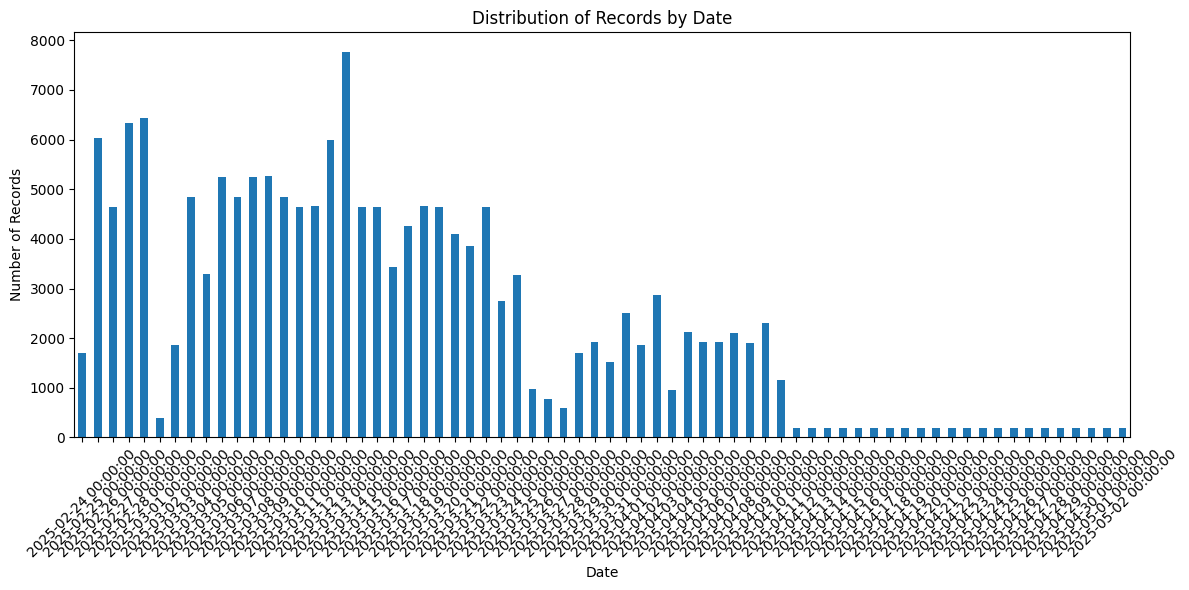

In [5]:
import matplotlib.pyplot as plt

# Get min and max dates
min_date = point_est_price_df['run_date'].min()
max_date = point_est_price_df['run_date'].max()



# Create a count plot of dates to see distribution
plt.figure(figsize=(12, 6))
point_est_price_df['run_date'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Records by Date')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()